<center><h1> TP1 </h1></center>

<br>
<h4><b>1 File Format </b></h4>

<b> Question 1: </b>

In [1]:
from scipy.io import arff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA 
import matplotlib.patches as mpatches

In [2]:
data = arff.loadarff('/Users/lucas/Desktop/Polytech/IG4/S7/data_mining/weather.nominal.arff')
df = pd.DataFrame(data[0])
df.head()

,outlook,temperature,humidity,windy,play
0,b'sunny',b'hot',b'high',b'FALSE',b'no'
1,b'sunny',b'hot',b'high',b'TRUE',b'no'
2,b'overcast',b'hot',b'high',b'FALSE',b'yes'
3,b'rainy',b'mild',b'high',b'FALSE',b'yes'
4,b'rainy',b'cool',b'normal',b'FALSE',b'yes'


<br>
<b> Question 2:</b>

In [3]:
df.columns

Index(['outlook', 'temperature', 'humidity', 'windy', 'play'], dtype='object')

On peut voir qu'il y a 5 attributs : outlook, temperature, humidity, windy, play.

In [4]:
for column in df.columns:
    print("voici les valeurs possibles et leur occurence pour l'attribut ", column)
    print(df[column].value_counts())
    print('-'*20)

voici les valeurs possibles et leur occurence pour l'attribut  outlook
b'rainy'       5
b'sunny'       5
b'overcast'    4
Name: outlook, dtype: int64
--------------------
voici les valeurs possibles et leur occurence pour l'attribut  temperature
b'mild'    6
b'cool'    4
b'hot'     4
Name: temperature, dtype: int64
--------------------
voici les valeurs possibles et leur occurence pour l'attribut  humidity
b'normal'    7
b'high'      7
Name: humidity, dtype: int64
--------------------
voici les valeurs possibles et leur occurence pour l'attribut  windy
b'FALSE'    8
b'TRUE'     6
Name: windy, dtype: int64
--------------------
voici les valeurs possibles et leur occurence pour l'attribut  play
b'yes'    9
b'no'     5
Name: play, dtype: int64
--------------------


<br>
<b> Question 3:</b>


In [5]:
#replace each non numerical value per numerical value.

<br>
<b>Question 4:</b>

In [6]:
data_iris = arff.loadarff('/Users/lucas/Desktop/Polytech/IG4/S7/data_mining/iris.arff')
df_iris = pd.DataFrame(data_iris[0])
df_iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,b'Iris-setosa'
1,4.9,3.0,1.4,0.2,b'Iris-setosa'
2,4.7,3.2,1.3,0.2,b'Iris-setosa'
3,4.6,3.1,1.5,0.2,b'Iris-setosa'
4,5.0,3.6,1.4,0.2,b'Iris-setosa'


In [7]:
X_petal = df_iris.drop(['class','sepallength','sepalwidth'], axis=1)
X_sepal = df_iris.drop(['class','petallength','petalwidth'], axis=1)
y = df_iris['class']


In [8]:
df_iris['class'].value_counts()

b'Iris-virginica'     50
b'Iris-versicolor'    50
b'Iris-setosa'        50
Name: class, dtype: int64

<b> Pour voir Les discriminations des attributs, une ACP est très utile.</b>
- On peut voir que grâce aux <b>pétals</b>, des clusters qui sont bien délimités.
- Pour les <b>sépals</b>, <b>Iris-setosa</b> forme un cluster à part entière, cependant, la délimitation des clusters correspondant à <b>Iris-versicolor</b> et <b>Iris-virginica</b> est assez flou.

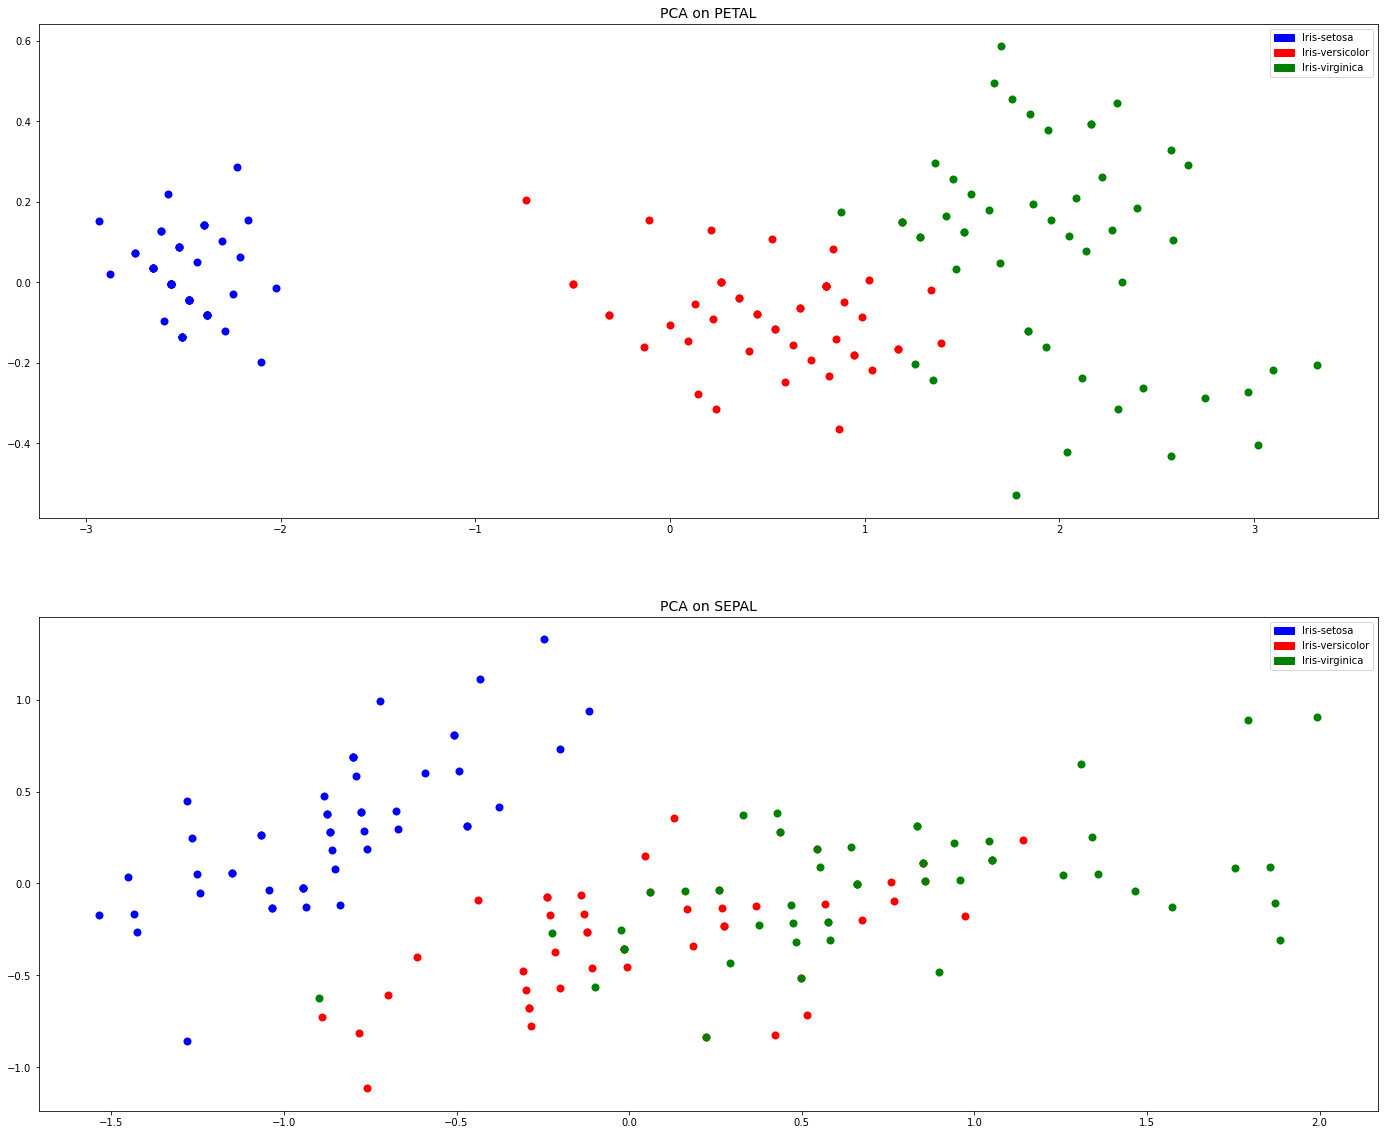

In [9]:
f, (ax1,ax2) = plt.subplots(2, 1, figsize=(24,20))
blue_patch = mpatches.Patch(color='blue', label='Iris-setosa')
red_patch = mpatches.Patch(color='red', label='Iris-versicolor')
green_patch = mpatches.Patch(color='green', label='Iris-virginica')


#ACP PETAL
X_pca_petal = PCA(n_components=2, random_state=42).fit_transform(X_petal.values)

ax1.scatter(X_pca_petal[y==b'Iris-setosa',0], X_pca_petal[y==b'Iris-setosa',1], c='blue',cmap='coolwarm', label='Iris-setosa', linewidths=2)
ax1.scatter(X_pca_petal[y==b'Iris-versicolor',0], X_pca_petal[y==b'Iris-versicolor',1], c='red',cmap='coolwarm',label='Iris-versicolor', linewidths=2)
ax1.scatter(X_pca_petal[y==b'Iris-virginica',0], X_pca_petal[y==b'Iris-virginica',1], c='green', cmap='coolwarm',label='Iris-virginica', linewidths=2)
ax1.set_title('PCA on PETAL', fontsize=14)
ax1.legend(handles=[blue_patch, red_patch, green_patch])

#ACP SEPAL

X_pca_sepal = PCA(n_components=2, random_state=42).fit_transform(X_sepal.values)

ax2.scatter(X_pca_sepal[y==b'Iris-setosa',0], X_pca_sepal[y==b'Iris-setosa',1], c='blue',cmap='coolwarm', label='Iris-setosa', linewidths=2)
ax2.scatter(X_pca_sepal[y==b'Iris-versicolor',0], X_pca_sepal[y==b'Iris-versicolor',1], c='red',cmap='coolwarm',label='Iris-versicolor', linewidths=2)
ax2.scatter(X_pca_sepal[y==b'Iris-virginica',0], X_pca_sepal[y==b'Iris-virginica',1], c='green', cmap='coolwarm',label='Iris-virginica', linewidths=2)
ax2.set_title('PCA on SEPAL', fontsize=14)
ax2.legend(handles=[blue_patch, red_patch, green_patch])


plt.show()




<br>
<b>Question 6: </b>

In [10]:
data_weather = arff.loadarff('/Users/lucas/Desktop/Polytech/IG4/S7/data_mining/weather.numeric.arff')
df_weather = pd.DataFrame(data_weather[0])
df_weather.head()

,outlook,temperature,humidity,windy,play
0,b'sunny',85.0,85.0,b'FALSE',b'no'
1,b'sunny',80.0,90.0,b'TRUE',b'no'
2,b'overcast',83.0,86.0,b'FALSE',b'yes'
3,b'rainy',70.0,96.0,b'FALSE',b'yes'
4,b'rainy',68.0,80.0,b'FALSE',b'yes'


<br>
<h4><b>2 Decision Trees </b></h4>

<h4> <b>2.1 Running Decision Trees</b></h4>

<b> Question a: </b>

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_predict

In [12]:
df_titanic =  pd.read_csv('/Users/lucas/Desktop/Polytech/IG4/S7/data_mining/titanic.csv')

In [13]:
for column in df_titanic.columns:
    print("voici les valeurs possibles et leur occurence pour l'attribut ", column)
    print(df_titanic[column].value_counts())
    print('-'*20)

voici les valeurs possibles et leur occurence pour l'attribut  CLASS
crew    885
3rd     706
1st     325
2nd     285
Name: CLASS, dtype: int64
--------------------
voici les valeurs possibles et leur occurence pour l'attribut  AGE
adult    2092
child     109
Name: AGE, dtype: int64
--------------------
voici les valeurs possibles et leur occurence pour l'attribut  SEX
male      1731
female     470
Name: SEX, dtype: int64
--------------------
voici les valeurs possibles et leur occurence pour l'attribut  SURVIVED
no     1490
yes     711
Name: SURVIVED, dtype: int64
--------------------


In [14]:
def features_engineering(df):
    
    class_mapping = {'1st': 1, '2nd': 2, '3rd': 3, 'crew': 4}
    sex_mapping = {'male':0,'female':1}
    age_mapping = {'child':0,'adult':1}
    surv_mapping = {'no':0,'yes':1}
    
    df = df.replace({'CLASS': class_mapping, 'SEX': sex_mapping, 'AGE': age_mapping, 'SURVIVED': surv_mapping})
    
    return df

In [15]:
df_titanic = features_engineering(df_titanic)
df_titanic

,CLASS,AGE,SEX,SURVIVED
0,1,1,0,1
1,1,1,0,1
2,1,1,0,1
3,1,1,0,1
4,1,1,0,1
...,...,...,...,...
2196,4,1,1,1
2197,4,1,1,1
2198,4,1,1,0
2199,4,1,1,0


<br>
<b>Question b:</b>

<b>On sépare l'ensemble en deux, données d'entrainement (80% des données) et données test (20%).</b>

In [16]:
df_first_train, df_final_test = train_test_split(df_titanic,test_size=0.2, random_state=42)

<br>
<b>On sépare les données d'entraînement en deux, données qui vont entraîner le modèle (80% du premier train set) et données de validation (20%).</b>

In [17]:
df_train, df_test = train_test_split(df_first_train,test_size=0.2, random_state=42)

In [18]:
X_train = df_train.drop('SURVIVED', axis=1)
y_train = df_train['SURVIVED']

X_test = df_test.drop('SURVIVED', axis=1)
y_test = df_test['SURVIVED']

<h4> <b> 2.2 premières prédictions et evaluation du modèle.</b>

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
#methode pour basique accuracy de classifier
def accuracy_classifier(classifiers, X_train, y_train, X_test, y_test):
    plt.style.use('seaborn')
    predictions = {}
    
    for key, classifier in classifiers.items():
        print(key)
        if(key == "KNearest"):#On va tester plusieurs k et garder le meilleur.
            acc_k = pd.Series([],dtype=pd.StringDtype())
            max_accuracy = 0
            max_k = 0
            for i in range(1, 30):
                
                classifiers[key] = KNeighborsClassifier(n_neighbors=i)
                classifiers[key].fit(X_train, y_train.values)
                
                pred = classifiers[key].predict(X_test)
                k_score = accuracy_score(pred, y_test)
                
                acc_k = acc_k.append(pd.Series(k_score))
                if(max_accuracy < k_score):
                    max_accuracy = k_score
                    max_k = i
                    
            #On affiche
            
            x=range(0,30)
            plt.plot(range(1,30), acc_k)
            fig=plt.gcf()
            plt.xticks(x)
            fig.set_size_inches(12,6)
            plt.show()
            
            classifiers[key] = KNeighborsClassifier(n_neighbors=max_k)
            predictions[key] = max_accuracy
            print('kNeighbors', max_k)  
            
        else:
            classifier.fit(X_train, y_train.values)
            pred = classifier.predict(X_test)
            predictions[key] = accuracy_score(pred, y_test)
            
            
        print('accuracy:', predictions[key])
        print('-'*20)
        
        
    return(predictions)

#methode pour matrice de confusion
def confusion_accuracy(classifiers, X, y):
 
    precisions = {}
    recalls = {}
    f1s = {}
    matrix = {}
    
    index = 0
    for key, classifier in classifiers.items():
        print(key)
        y_predict = cross_val_predict(classifier, X, y.values, cv=3)
        
        precisions[key] = precision_score(y, y_predict)
        recalls[key] = recall_score(y, y_predict)
        f1s[key] = f1_score(y, y_predict)
        matrix[key] = confusion_matrix(y, y_predict)
        
        print('prec score:', precisions[key])
        print('recall score:', recalls[key])
        print('f1 score:', f1s[key])
        
        sns.heatmap(matrix[key],annot=True,fmt='2.0f')
       
        plt.show()
        print('-'*20)
        index +=1
    return(precisions, recalls, f1s)


#methode pour la cross validation
def cross_val_classifiers(kfold, X, y, classifiers):
    mean_cross_val = {}
    std_cross_val = {}
    
    for key, classifier in classifiers.items():
        cross_scores = cross_val_score(classifier, X, y,scoring='accuracy', cv = kfold)
    
        mean_cross_val[key] = cross_scores.mean()
        std_cross_val[key] = cross_scores.std()
    
    return(mean_cross_val, std_cross_val)

0.7954545454545454


<br>
<b>Simple prédiction du sur le validation test</b>

dtc
accuracy: 0.7954545454545454
--------------------
KNearest


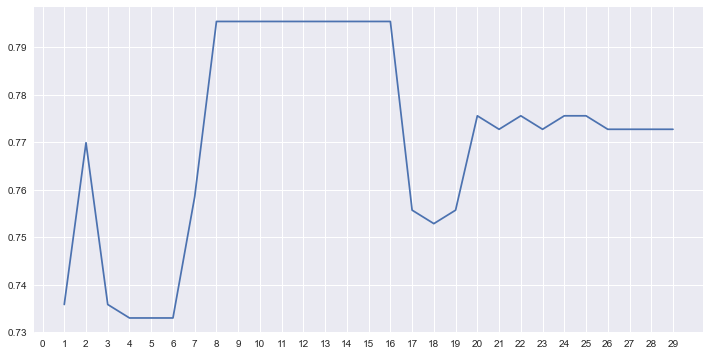

kNeighbors 8
accuracy: 0.7954545454545454
--------------------
LogisiticRegression
accuracy: 0.7926136363636364
--------------------
{'dtc': 0.7954545454545454, 'KNearest': 0.7954545454545454, 'LogisiticRegression': 0.7926136363636364}


In [24]:
classifiers = {"dtc":DecisionTreeClassifier(), "KNearest":KNeighborsClassifier(),
               "LogisiticRegression": LogisticRegression()   }

predictions = accuracy_classifier(classifiers, X_train, y_train, X_test, y_test)
print(predictions)

<br>
<b> Matrix de confusion, recall et precision pour assurer une bonne classification de chaque label.</b>

dtc
prec score: 0.907608695652174
recall score: 0.3761261261261261
f1 score: 0.5318471337579619


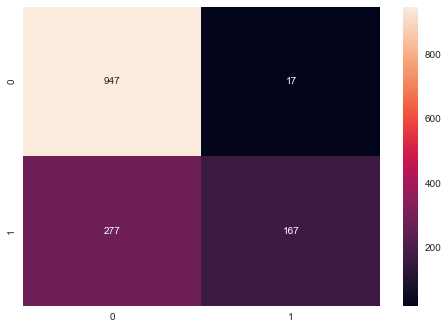

--------------------
KNearest
prec score: 0.7567567567567568
recall score: 0.3783783783783784
f1 score: 0.5045045045045046


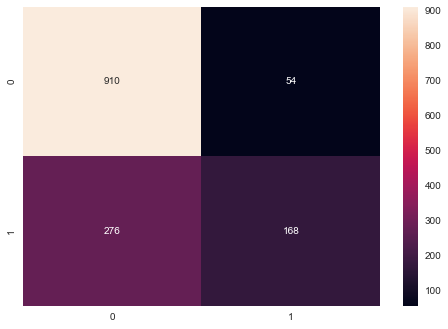

--------------------
LogisiticRegression
prec score: 0.7074829931972789
recall score: 0.46846846846846846
f1 score: 0.5636856368563685


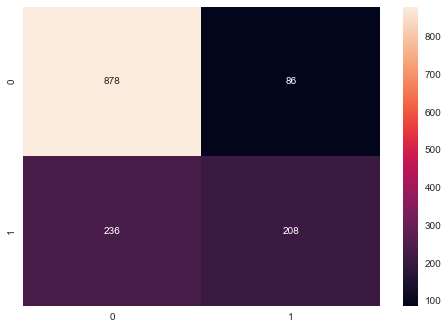

--------------------


In [25]:
precisions, recalls, f1s = confusion_accuracy(classifiers, X_train, y_train)

In [26]:
kfold = StratifiedKFold(n_splits=5)

mean_accuracies, std_accuracies = cross_val_classifiers(kfold, X_train, y_train,classifiers )
cross_validation = pd.DataFrame({'train_predictions':predictions,'mean_cross_valid':mean_accuracies,'std_cross_valid':std_accuracies}, index=classifiers.keys())
cross_validation


,train_predictions,mean_cross_valid,std_cross_valid
dtc,0.795455,0.791186,0.009777
KNearest,0.795455,0.786207,0.011143
LogisiticRegression,0.792614,0.774132,0.013095


<br>
<b> Fine tune model</b>

In [27]:
from sklearn.model_selection import GridSearchCV
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNearest": KNeighborsClassifier()
    
}

params_classifiers = {
     "LogisticRegression": [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
    
    "DecisionTreeClassifier": [{'criterion':['gini','entropy'],'splitter':['best', 'random'],'max_depth':range(1,201),
               'max_features':['auto','sqrt','log2']}],
    
    "KNearest": [{'n_neighbors':range(1,15),'weights':['uniform', 'distance'],'metric':['euclidean','manhattan','minkowski'] }]
    
}

In [28]:
from sklearn.model_selection import GridSearchCV

best_estimators = {}

for key, classifier in classifiers.items():
    grid = GridSearchCV(classifier, params_classifiers[key])

    grid.fit(X_train, y_train)
    best_estimators[key] = grid.best_estimator_
    print(grid.best_estimator_)

LogisticRegression(C=1)
DecisionTreeClassifier(max_depth=4, max_features='sqrt')
KNeighborsClassifier(metric='euclidean', n_neighbors=10)


<br>
<b> Prediction sur le final test </b>

In [29]:
X_train = df_first_train.drop('SURVIVED', axis=1)
y_train = df_first_train['SURVIVED']


X_final_test = df_final_test.drop('SURVIVED', axis=1)

y_final_test = df_final_test['SURVIVED']

prec score: 0.7706422018348624
recall score: 0.5283018867924528
f1 score: 0.626865671641791


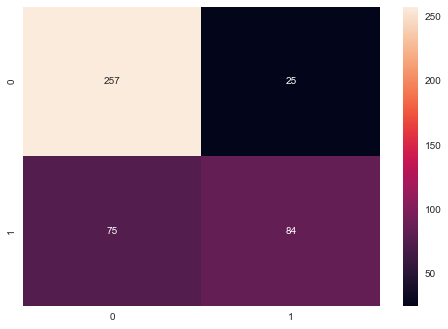

In [30]:
log = best_estimators['LogisticRegression']
log.fit(X_train,y_train)
y_predict = log.predict(X_final_test)

precision = precision_score(y_final_test, y_predict)
recall = recall_score(y_final_test, y_predict)
f1 = f1_score(y_final_test, y_predict)
matrix = confusion_matrix(y_final_test, y_predict)
print('prec score:', precision)
print('recall score:', recall)
print('f1 score:', f1)
        
sns.heatmap(matrix,annot=True,fmt='2.0f')
plt.show()

[Text(205.57894736842104, 269.082, 'X[0] <= 2.5\ngini = 0.431\nsamples = 1760\nvalue = [1208, 552]'),
 Text(70.48421052631579, 209.286, 'X[1] <= 0.5\ngini = 0.499\nsamples = 474\nvalue = [226, 248]'),
 Text(46.98947368421052, 149.49, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(93.97894736842105, 149.49, 'X[0] <= 1.5\ngini = 0.5\nsamples = 449\nvalue = [226, 223]'),
 Text(46.98947368421052, 89.69399999999999, 'X[2] <= 0.5\ngini = 0.476\nsamples = 246\nvalue = [96, 150]'),
 Text(23.49473684210526, 29.897999999999968, 'gini = 0.452\nsamples = 142\nvalue = [93, 49]'),
 Text(70.48421052631579, 29.897999999999968, 'gini = 0.056\nsamples = 104\nvalue = [3, 101]'),
 Text(140.96842105263158, 89.69399999999999, 'X[2] <= 0.5\ngini = 0.461\nsamples = 203\nvalue = [130, 73]'),
 Text(117.4736842105263, 29.897999999999968, 'gini = 0.176\nsamples = 133\nvalue = [120, 13]'),
 Text(164.46315789473684, 29.897999999999968, 'gini = 0.245\nsamples = 70\nvalue = [10, 60]'),
 Text(340.6736842105263, 2

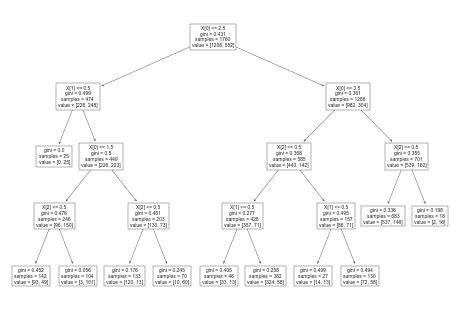

In [31]:
from sklearn import tree
dtc = best_estimators['DecisionTreeClassifier']
dtc.fit(X_train,y_train)
tree.plot_tree(dtc)

prec score: 0.9315068493150684
recall score: 0.4276729559748428
f1 score: 0.5862068965517241


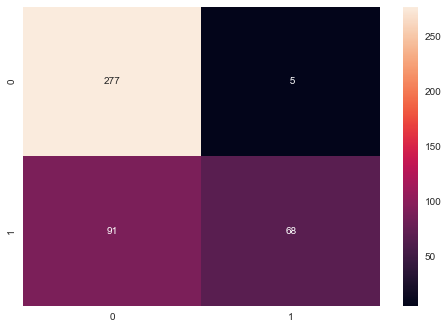

In [32]:
y_predict = dtc.predict(X_final_test)

precision = precision_score(y_final_test, y_predict)
recall = recall_score(y_final_test, y_predict)
f1 = f1_score(y_final_test, y_predict)
matrix = confusion_matrix(y_final_test, y_predict)
print('prec score:', precision)
print('recall score:', recall)
print('f1 score:', f1)

sns.heatmap(matrix,annot=True,fmt='2.0f')
plt.show()

prec score: 0.8961038961038961
recall score: 0.4339622641509434
f1 score: 0.5847457627118644


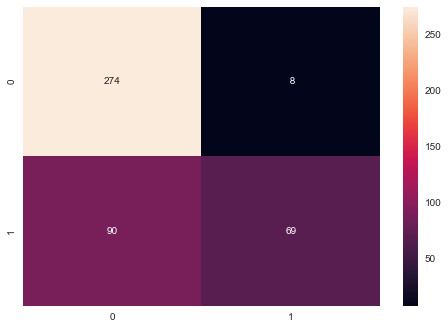

In [33]:
knn = best_estimators['KNearest']
knn.fit(X_train,y_train)
y_predict = knn.predict(X_final_test)

precision = precision_score(y_final_test, y_predict)
recall = recall_score(y_final_test, y_predict)
f1 = f1_score(y_final_test, y_predict)
matrix = confusion_matrix(y_final_test, y_predict)
print('prec score:', precision)
print('recall score:', recall)
print('f1 score:', f1)
        
sns.heatmap(matrix,annot=True,fmt='2.0f')
plt.show()

Finalement:
- Les classifiers <b>Knearest et DecisionTreeClassifier</b> obtiennent relativement les mêmes résultats sur le final test.
- Cependant, le <b>DecisionTreeClassifier</b> avait une meilleure précision lors de la cross validation.